In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# Constants
hbar = 1.055e-34      # Js
q = 1.602e-19         # C
m = 9.1e-31           # kg
bohr_radii = 5.29e-11 # m
a = 1e-10             # m

In [127]:
def VQD(alpha, x1, x):
    return alpha * (x - x1) ** 2

In [128]:
def get_eigenvalue_and_eigenvectors_VQD(alpha):
    # Create Hamiltonian
    Np = 500
    X = a * np.linspace(1, Np, Np) / 1e-9 # nm
    # divide by q to convert to eV, accounting for mass of quantum dot ~ 0.2 mass of electron
    t0 = (hbar * hbar) / (2 * 0.2 * m * a * a) / q
    on = 2.0 * t0 * np.ones(Np)
    off = -t0 * np.ones(Np - 1)

    x1 = 25 # nm
    U = np.array([VQD(alpha, x1,  x) for x in X])
    H = np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)
    W, V = np.linalg.eig(H)
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:, idx]

    return W, V, X, U

In [153]:
W, V, X, U = get_eigenvalue_and_eigenvectors_VQD(2e-5)
eigenvalue_0, eigenvalue_1 = W[0:2]
print(f'Energy Gap: {(W[1] - W[0]) / 1e-3} meV')

Energy Gap: 4.067631132893091 meV


In [146]:
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])

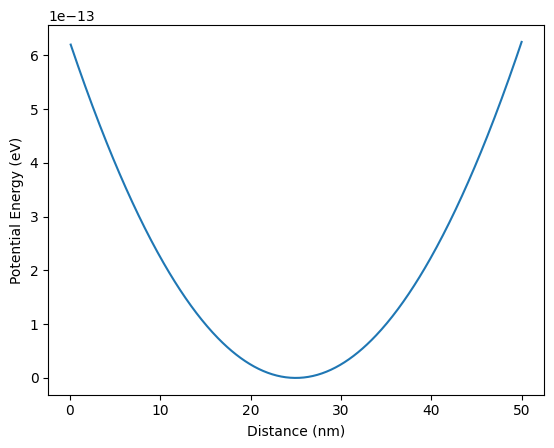

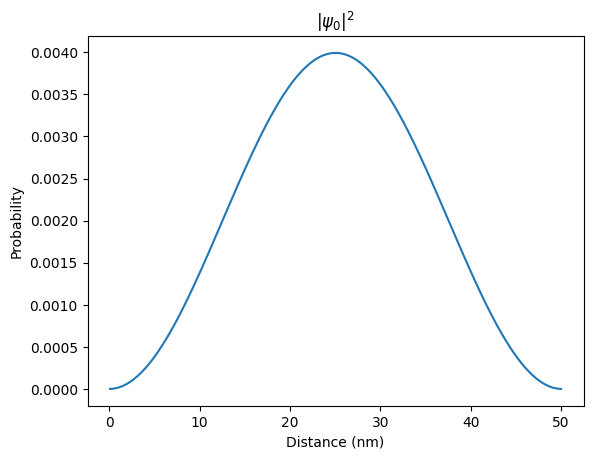

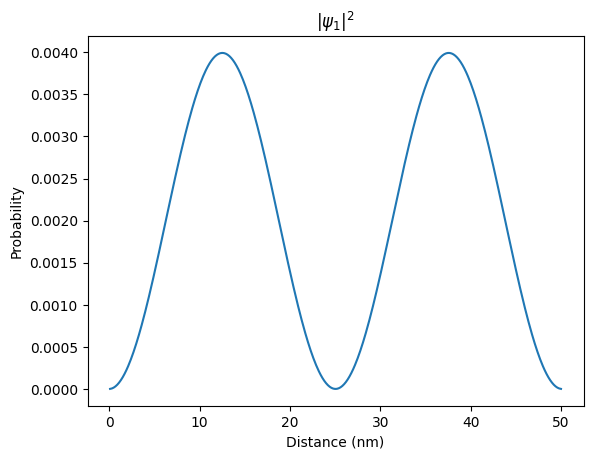

In [147]:
plt.figure(1)
plt.plot(X, U)
plt.xlabel('Distance (nm)')
plt.ylabel('Potential Energy (eV)')
plt.show()

plt.figure(2)
plt.plot(X, Psi0)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_0|^2$')
plt.show()

plt.figure(3)
plt.plot(X, Psi1)
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title(r'$|\psi_1|^2$')
plt.show()